# **Introduction**
---

As the world becomes increasingly reliant on computer vision, object detection has emerged as a critical technique for unlocking the potential of this technology. With the rise of deep learning, object detection algorithms have become more powerful than ever before, enabling real-time, accurate detection of objects in images and videos. In this project, we'll be using the cutting-edge YOLOv8 algorithm to detect pistols in images and videos. But this isn't just any ordinary object detection project. We'll be pushing the boundaries of what's possible by exploring advanced techniques like transfer learning and data augmentation to improve the accuracy and robustness of our detection system. By the end of this project, we hope to not only have a highly effective pistol detection system, but also to have contributed to the state-of-the-art in object detection research. So buckle up and get ready for an exciting journey into the world of computer vision!

## **Table of Contents**
---
* [Dataset Overview](#Dataset-Overview )
    * [Class Visualization](#Class-Visualization)
    * [Dataset Distribution](#Dataset-Distribution)
    * [Image Preprocessing & Augmentation](#Image-Preprocessing-&-Augmentation)
* [Model](#Model)
     * [Model Training](#Model-Training)
     * [Model Performance](#Model-Performance)
* [Evaluation](#Evaluation)
     * [mAP Metrics](#mAP-Metrics)
     * [Confusion Matrix](#Confusion-Matrix)
* [Usage](#Usage)

In [1]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg

In [2]:
# Enabling inline plotting for Matplotlib in Jupyter Notebook
%matplotlib inline

In [3]:
# Setting plot style
plt.style.use('ggplot')

## **Dataset Overview**
---

### Class Visualization

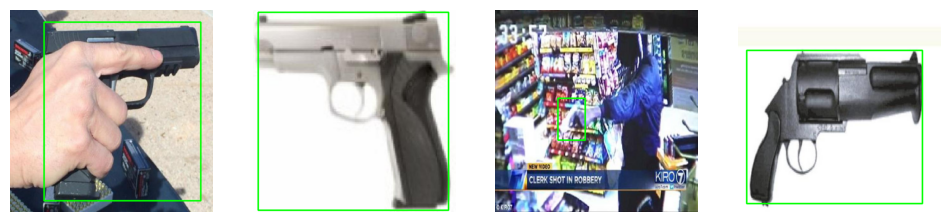

In [4]:
# Define the paths to the images and labels directories
images_dir = "Data/Dataset/Validation/Images"
labels_dir = "Data/Dataset/Validation/Labels"

# Get a list of all the image files in the images directory
image_files = os.listdir(images_dir)

# Choose 4 random image files from the list
random_images = random.sample(image_files, 4)

# Set up the plot
fig, axs = plt.subplots(1, 4, figsize = (12, 12))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    
    # Load the image
    image_path = os.path.join(images_dir, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(labels_dir, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    for label in labels:
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    # Show the image with the object detections
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[i].axis('off')

### Dataset Distribution

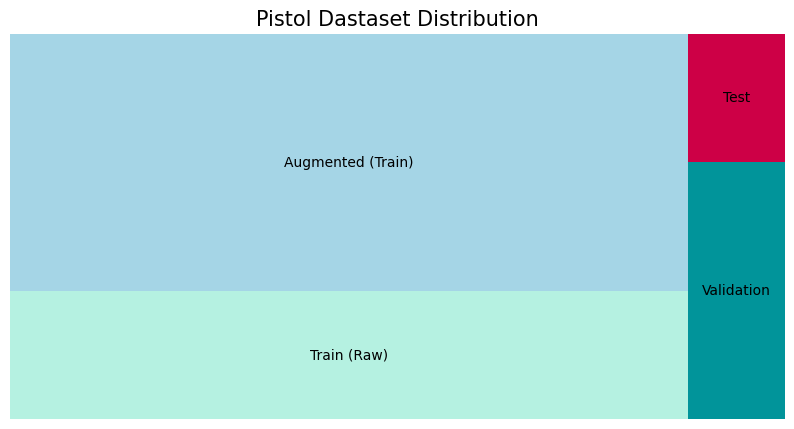

In [5]:
# All the data split names
data_splits = ["Train (Raw)", "Augmented (Train)", "Validation", "Test"]

# Number of images for each data split
image_counts = [2082, 4158, 594, 297]

# Create a squarify plot of the class distribution
fig, ax = plt.subplots(figsize = (10, 5))

colors = ["#B5F1E1", "#A5D5E6", "#01949A", "#CD0046"]

squarify.plot(image_counts,
              label = data_splits,
              ax = ax,
              text_kwargs = {"fontsize": 10},
              color = colors)

plt.title("Pistol Dastaset Distribution", fontsize = 15)
plt.axis("off");

### Image Preprocessing & Augmentation

The Roboflow website was used to apply a series of image processing and augmentation steps to the pistol dataset. This platform offers a user-friendly interface that simplifies the process of preparing image data for machine learning applications.


The following pre-processing was applied to each image:
* Auto-orientation of pixel data (with EXIF-orientation stripping)
* Resize to 640x640 (Stretch)

The following augmentation was applied to create 3 versions of each train image:
* 50% probability of horizontal flip
* 50% probability of vertical flip
* Random rotation of between -45 and +45 degrees
* Random brigthness adjustment of between -30 and +30 percent
* Random Gaussian blur of between 0 and 4.5 pixels

[Dataset Link](https://public.roboflow.com/object-detection/pistols)

## **Model**
---

### Model Training

In [ ]:
 # Loading a pretrained model
model = YOLO('yolov8x.pt')

# Training the model
model.train(data = 'Data/Dataset/data.yaml',
            epochs = 20,
            imgsz = 640,
            seed = 42)

### Model Performance

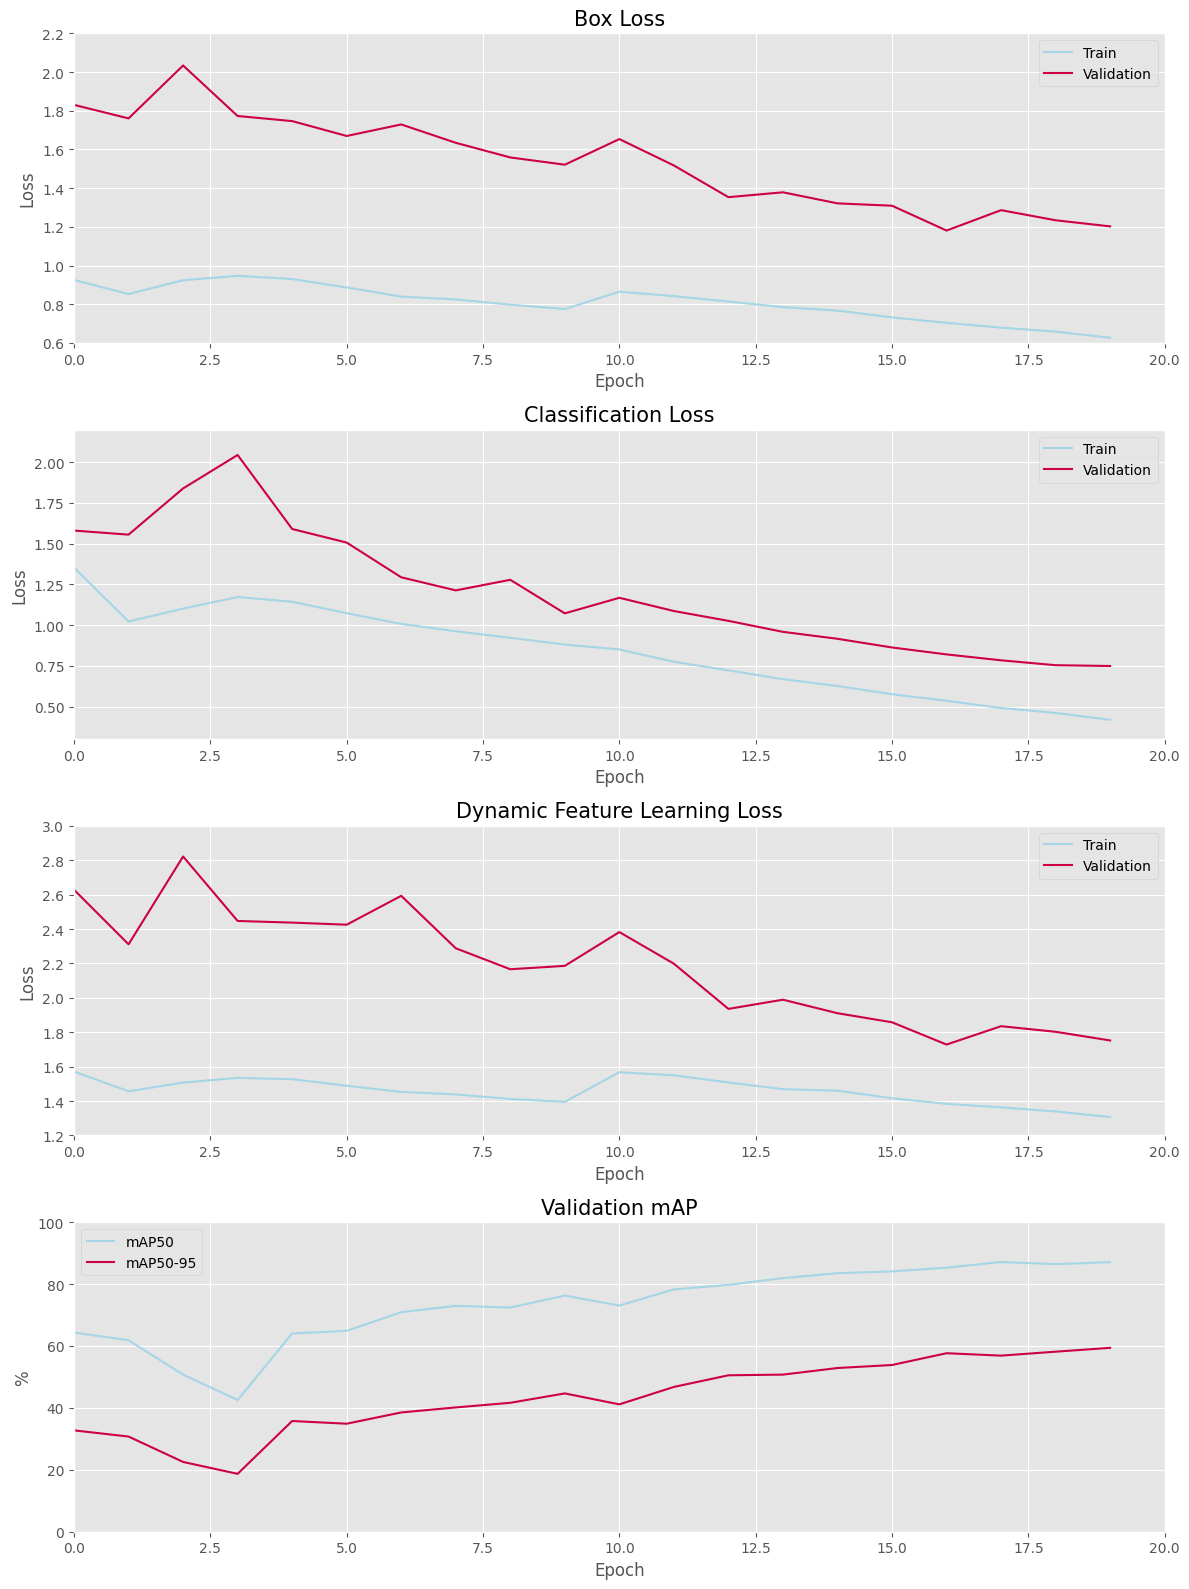

In [6]:
# Load the Results Excel file into a Pandas DataFrame
df = pd.read_excel('Data/Training Results/Results.xlsx')

# Extract the relevant columns
train_box_loss = df['train/box_loss']
val_box_loss = df['val/box_loss']
train_cls_loss = df['train/cls_loss']
val_cls_loss = df['val/cls_loss']
train_dfl_loss = df['train/dfl_loss']
val_dfl_loss = df['val/dfl_loss']
val_mAP50 = df['metrics/mAP50(B)'] * 100
val_mAP50_95 = df['metrics/mAP50-95(B)'] * 100

# Create the subplots
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (12, 16))

# Plotting the box loss
axes[0].plot(train_box_loss, label = 'Train', color = "#A5D5E6")
axes[0].plot(val_box_loss, label = 'Validation', color = "#CD0046")
axes[0].set_xlim(0, 20)
axes[0].set_ylim(0.6, 2.2)
axes[0].set_title('Box Loss', fontsize = 15)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plotting the classification loss
axes[1].plot(train_cls_loss, label = 'Train', color = "#A5D5E6")
axes[1].plot(val_cls_loss, label = 'Validation', color = "#CD0046")
axes[1].set_xlim(0, 20)
axes[1].set_ylim(0.3, 2.2)
axes[1].set_title('Classification Loss', fontsize = 15)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Plotting the DFL loss
axes[2].plot(train_dfl_loss, label = 'Train', color = "#A5D5E6")
axes[2].plot(val_dfl_loss, label = 'Validation', color = "#CD0046")
axes[2].set_xlim(0, 20)
axes[2].set_ylim(1.2, 3.0)
axes[2].set_title('Dynamic Feature Learning Loss', fontsize = 15)
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Loss')
axes[2].legend()

# Plotting mAP50 and mAP50-95
axes[3].plot(val_mAP50, label = 'mAP50', color = "#A5D5E6")
axes[3].plot(val_mAP50_95, label='mAP50-95', color = "#CD0046")
axes[3].set_xlim(0, 20)
axes[3].set_ylim(0, 100)
axes[3].set_title('Validation mAP', fontsize = 15)
axes[3].set_xlabel('Epoch')
axes[3].set_ylabel('%')
axes[3].legend()

# Adjust the spacing between the subplots
fig.tight_layout()

# Display the plots
plt.show()

## **Evaluation**
---

### mAP Metrics

In [7]:
# Loading the best performing model
model = YOLO('Data/best.pt')

In [ ]:
# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25,
                    split = 'test')

In [ ]:
# Saving the evaluation results to a file
with open('Data/Evaluation Results/metrics.txt', 'w') as f:
  
    # Write each variable value on a separate line
    f.write('mAP50-95: {}\n'.format(metrics.box.map))
    f.write('mAP50: {}\n'.format(metrics.box.map50))
    f.write('mAP75: {}\n'.format(metrics.box.map75))

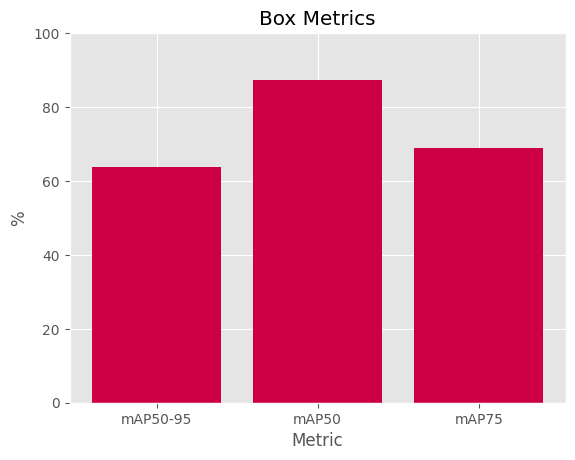

In [8]:
# Reading the results file
with open('Data/Evaluation Results/metrics.txt', 'r') as f:
    data = f.readlines()

# Parse the data
metrics = {}
for line in data:
    key, value = line.strip().split(': ')
    metrics[key] = float(value) * 100

# Plotting the evaluation metric results
fig, ax = plt.subplots()
ax.bar(metrics.keys(), metrics.values(), color = "#CD0046")

ax.set_ylim(0, 100)
ax.set_title('Box Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('%');

### Confusion Matrix

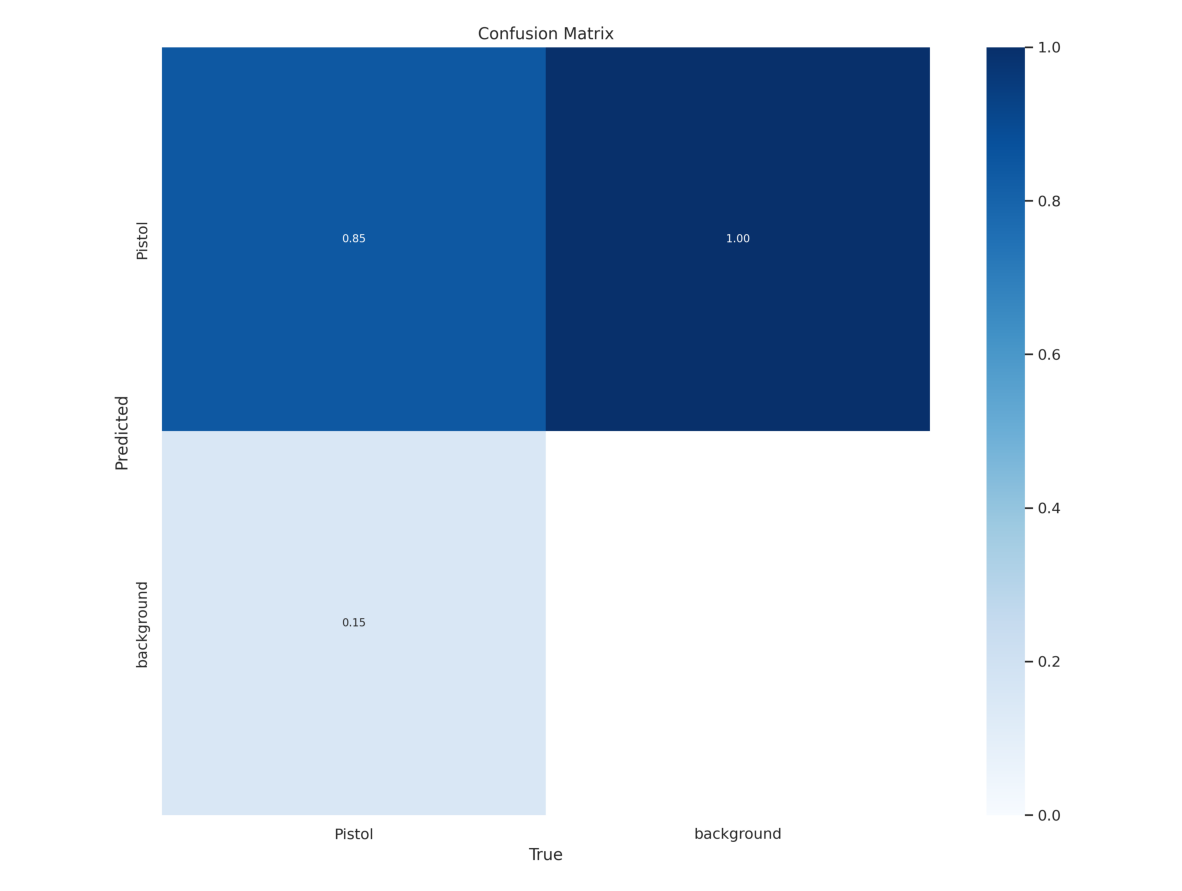

In [9]:
# Reading the confusion matrix image file
img = mpimg.imread('Data/Evaluation Results/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

## **Usage**
---

In [10]:
# Function to perform pistol detections
def pistol_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 640x448 1 Pistol, 751.3ms
Speed: 1.0ms preprocess, 751.3ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)

0: 448x640 1 Pistol, 694.3ms
Speed: 0.0ms preprocess, 694.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x480 1 Pistol, 754.7ms
Speed: 0.0ms preprocess, 754.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 Pistols, 1023.9ms
Speed: 0.0ms preprocess, 1023.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


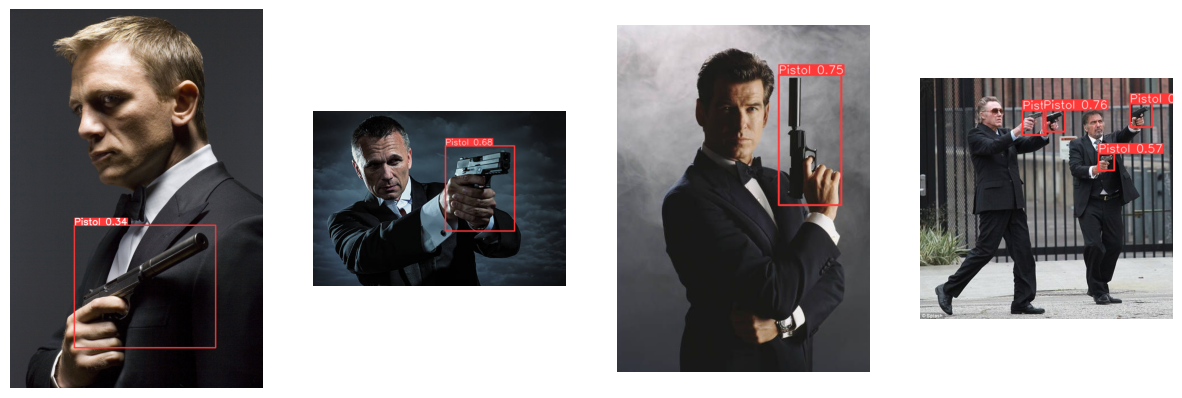

In [11]:
# Define the directory where the custom images are stored
custom_image_dir = 'Data/Custom Images/'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=1, ncols=len(image_files), figsize=(15, 15))

# Iterate over the image files and plot each one
for i, img_file in enumerate(image_files):
    
    img_path = os.path.join(custom_image_dir, img_file)
    
    detect_img = pistol_detect(img_path)
    
    axes[i].imshow(detect_img)
    axes[i].axis('off');